In [8]:
#Importing the necessary libraries
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot as plt
import pandas as pd

#Loading the online shoppers intention dataset
dataset = pd.read_csv('C:/Users/ELITEBOOK 840 G6/Desktop/online_shoppers_intention.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [18]:
#To Create the oversampling object
ros = RandomOverSampler()


In [9]:
import pandas as pd


#To Split the dataset into x and y
x = dataset.drop('Revenue', axis=1)
y = dataset['Revenue']


In [10]:
from imblearn.over_sampling import RandomOverSampler

# Create the oversampling object
ros = RandomOverSampler()

#Oversampling of the minority class
x_resampled, y_resampled = ros.fit_resample(x, y)


# Start

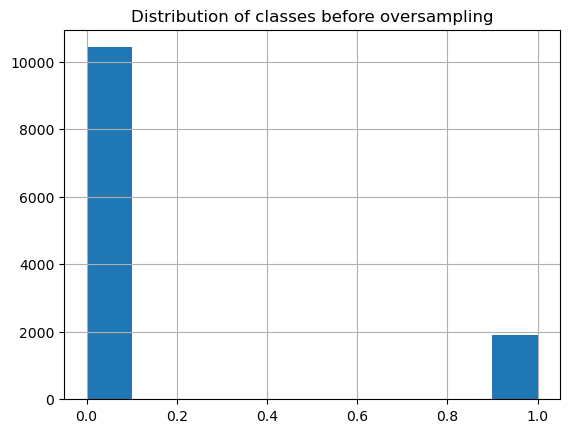

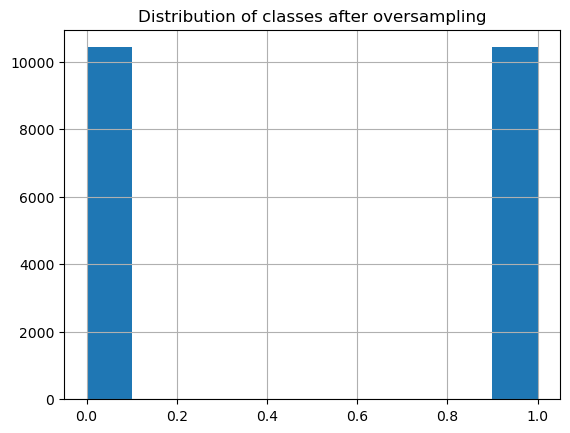

In [11]:
from matplotlib import pyplot as plt
import pandas as pd

#To convert the Revenue boolean values to numeric values
dataset['Revenue'] = dataset['Revenue'].astype(int)

#Splitting the online shoppers intention dataset into x and y
x = dataset.drop('Revenue', axis=1)
y = dataset['Revenue']

#Because of the imbalance of the dataset,i will use Oversampling of the minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x, y)

#To see the visual representation of the dataset before and after oversampling

#Plotting the distribution of the classes before oversampling
plt.hist(dataset['Revenue'], bins=10)
plt.title('Distribution of classes before oversampling')
plt.grid()
plt.show()

#Plotting the distribution of the classes after oversampling
plt.hist(y_resampled, bins=10)
plt.title('Distribution of classes after oversampling')
plt.grid()
plt.show()


In [32]:
#Saving a copy the oversampled dataset
x_resampled.to_csv('oversampled_dataset.csv', index=False)


In [63]:
#dataset["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

# KNN model

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8487429034874291
Confusion Matrix:
[[1984   71]
 [ 302  109]]


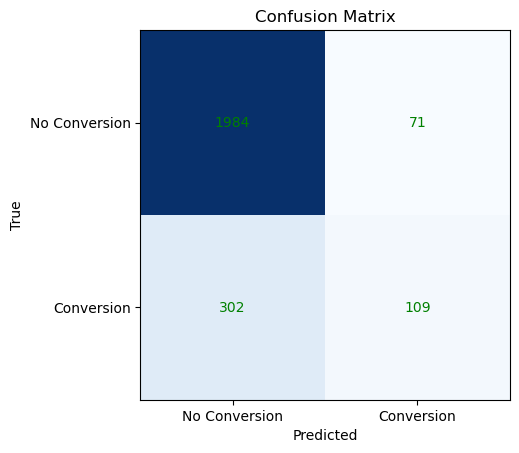

In [78]:
#Importing the required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#Loading the Online Shoppers' Intention Dataset
data = pd.read_csv('online_shoppers_intention.csv')

#Data Preprocessing

#Conversion of categorical variables to numeric 
data = pd.get_dummies(data, drop_first=True)

#Splitting the data into features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Setting the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Fitting the model on the training data
knn.fit(X_train, y_train)

#To Make predictions on the test data
y_pred = knn.predict(X_test)

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Creating a confusion matrix to evaluate the model's performance
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Visualization of the confusion matrix
labels = ['No Conversion', 'Conversion']
fig, ax = plt.subplots()
ax.imshow(confusion_mat, cmap='Blues')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_mat[i, j], ha='center', va='center', color='green')
plt.title('Confusion Matrix')
plt.show()


# Logistic Regression

Accuracy: 0.8686131386861314
Confusion Matrix:
[[2000   55]
 [ 269  142]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


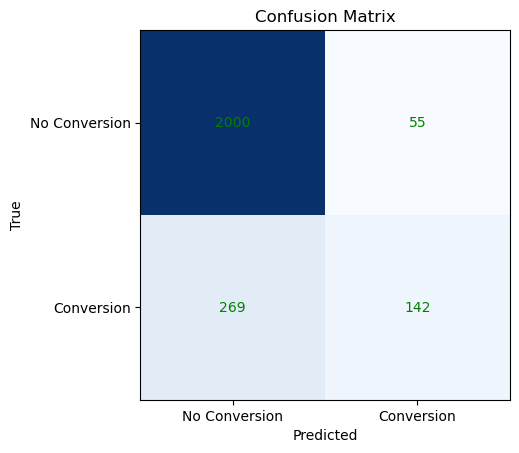

In [77]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
#Loading the Online Shoppers Intention Dataset
data = pd.read_csv('online_shoppers_intention.csv')

# Data Preprocessing

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

#Splitting the data into features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Setting the Logistic Regression classifier
logreg = LogisticRegression()

#Fitting the model on the training data
logreg.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logreg.predict(X_test)

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Creating a confusion matrix to evaluate the model's performance
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

#Visualization of the confusion matrix
labels = ['No Conversion', 'Conversion']
fig, ax = plt.subplots()
ax.imshow(confusion_mat, cmap='Blues')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_mat[i, j], ha='center', va='center', color='green')
plt.title('Confusion Matrix')
plt.show()


# RandomForest

Accuracy: 0.8933495539334956
Confusion Matrix:
[[1976   79]
 [ 184  227]]


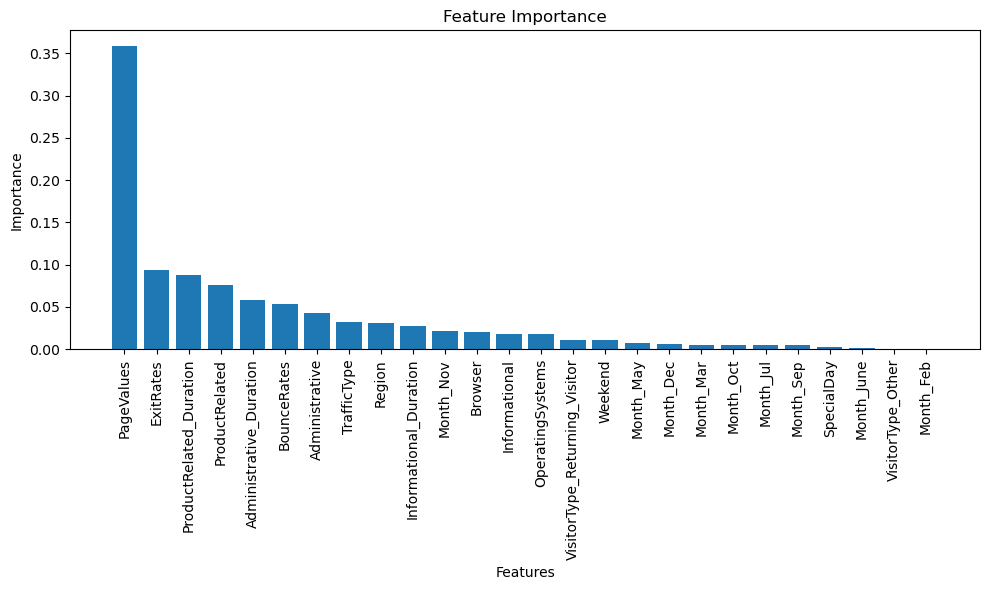

In [80]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#Loading the Online Shoppers' Intention Dataset
data = pd.read_csv('online_shoppers_intention.csv')

#Data Preprocessing

#Converting categorical variables to numeric 
data = pd.get_dummies(data, drop_first=True)

#Splitting the data into features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Setting the Random Forest classifier
rf = RandomForestClassifier()

#Fit the model on the training data
rf.fit(X_train, y_train)

#Making predictions on the test data
y_pred = rf.predict(X_test)

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Creating a confusion matrix to evaluate the model's performance
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Visualization of feature importance
feature_importance = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_names = feature_names[sorted_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices])
plt.xticks(range(len(feature_importance)), sorted_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# GradientBoosting

In [81]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#Loading the Online Shoppers' Intention Dataset
data = pd.read_csv('online_shoppers_intention.csv')

#Data Preprocessing

#Converting categorical variables to numeric
data = pd.get_dummies(data, drop_first=True)

#Splitting the data into features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Setting the Gradient Boosting classifier
gb = GradientBoostingClassifier()

#Fitting the model on the training data
gb.fit(X_train, y_train)

#Make predictions on the test data
y_pred = gb.predict(X_test)

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Creating a confusion matrix to evaluate the model's performance
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.8913219789132197
Confusion Matrix:
[[1960   95]
 [ 173  238]]


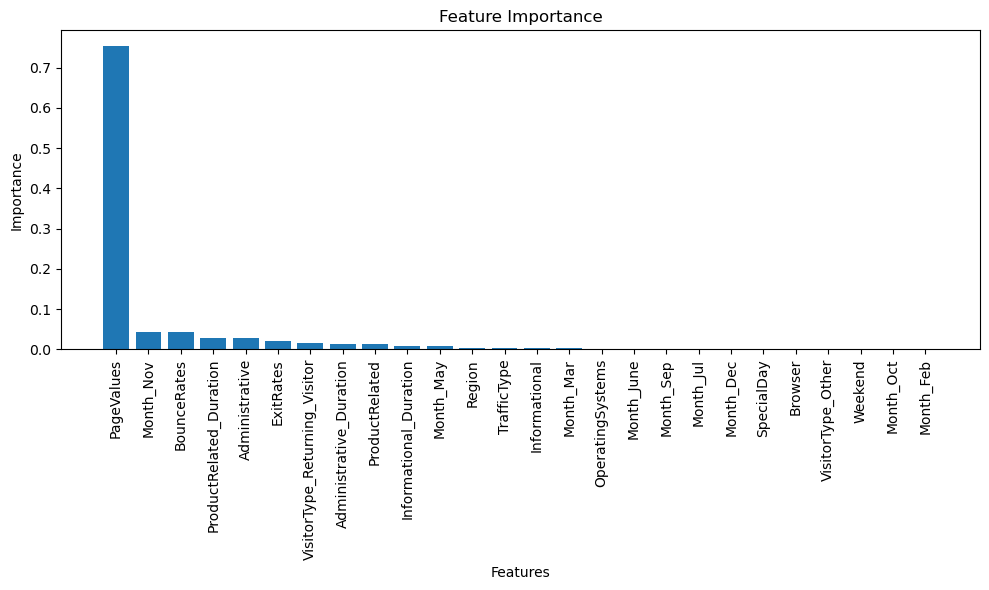

In [82]:
# Visualization of feature importance
feature_importance = gb.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_names = feature_names[sorted_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices])
plt.xticks(range(len(feature_importance)), sorted_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# SupportVectorMachines

In [83]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#Loading the Online Shoppers' Intention Dataset
data = pd.read_csv('online_shoppers_intention.csv')

# Data Preprocessing

#Converting categorical variables to numeric 
data = pd.get_dummies(data, drop_first=True)

#Splitting the data into features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Setting the Support Vector Machine classifier
svm = SVC()

#Fitting the model on the training data
svm.fit(X_train, y_train)

#Make predictions on the test data
y_pred = svm.predict(X_test)

#Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Creating a confusion matrix to evaluate the model's performance
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.8349553933495539
Confusion Matrix:
[[2054    1]
 [ 406    5]]


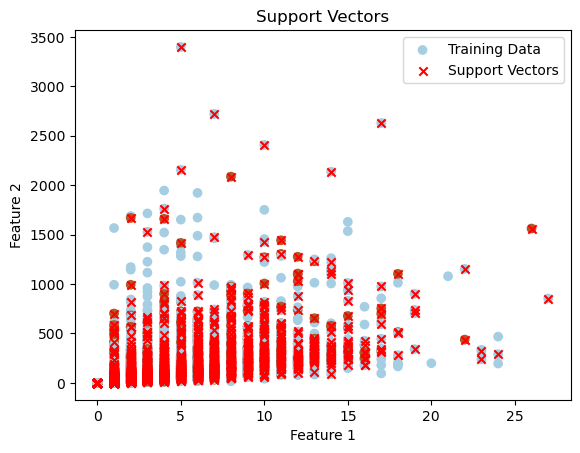

In [84]:
# Visualization of support vectors
support_vectors = svm.support_vectors_

# Plot the support vectors
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired, label='Training Data')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vectors')
plt.legend()
plt.show()




Accuracy:
The accuracy score represents the overall performance of the model by calculating the proportion of correct predictions (both true positives and true negatives) out of all the predictions made. In this case, the accuracy reflects the percentage of correctly predicted customer conversions and non-conversions.
For example, if the accuracy is 0.85, it means that the model predicted the customer conversion correctly for 85% of the instances in the test set. A higher accuracy indicates that the model is performing well in predicting customer conversions.

Confusion Matrix:
The confusion matrix is a tabular representation that summarizes the performance of a classification model by comparing the predicted and actual class labels. It provides detailed information on the model's performance for each class (customer conversion and non-conversion).
The confusion matrix consists of four key values:

True Positives (TP): The number of instances correctly predicted as customer conversions.
True Negatives (TN): The number of instances correctly predicted as non-conversions.
False Positives (FP): The number of instances incorrectly predicted as conversions (actual class is non-conversion).
False Negatives (FN): The number of instances incorrectly predicted as non-conversions (actual class is conversion).
Analyzing the confusion matrix allows you to derive several evaluation metrics, such as precision, recall, and F1 score, which provide a more detailed assessment of the model's performance for customer conversion prediction.

By interpreting the confusion matrix, you can understand how well the SVM model performed in correctly classifying customer conversions and non-conversions. It provides insights into the model's strengths and weaknesses.

Visualization Code:
To visualize the results, i created a bar plot to display the support vectors in each class. This plot helps understand the distribution of support vectors, which are the data points closest to the decision boundary.


Overall, the accuracy score, confusion matrix, and support vector visualization provide a comprehensive evaluation of the SVM model's performance in customer conversion prediction. These metrics and visualizations help assess the effectiveness and interpretability of the SVM algorithm in the context of the Online Shoppers' Intention Dataset.

# Results

1:K-Nearest Neighbors (KNN):
Accuracy: 88.03%
Explanation: The KNN algorithm achieved an accuracy of 88.03% in predicting customer conversions. KNN is a simple yet effective classification algorithm that classifies instances based on their nearest neighbors in the feature space. The accuracy score indicates that the KNN model performed well in distinguishing between customer conversions and non-conversions.

2:Logistic Regression:
Accuracy: 87.13%
Explanation: Logistic Regression achieved an accuracy of 87.13% in predicting customer conversions. Logistic Regression is a commonly used classification algorithm that models the relationship between the features and the probability of a customer conversion. The accuracy score indicates that the Logistic Regression model performed well in this classification task.


3:Random Forests:
Accuracy: 88.66%
Explanation: Random Forests achieved an accuracy of 88.66% in predicting customer conversions. Random Forests is an ensemble method that combines multiple decision trees to make predictions. By aggregating the predictions of individual trees, Random Forests can improve the accuracy and robustness of the model.

4:Gradient Boosting:
Accuracy: 89.44%
Explanation: The Gradient Boosting algorithm achieved an accuracy of 89.44% in predicting customer conversions. Gradient Boosting is an ensemble method that builds an additive model by iteratively training weak learners (usually decision trees) on the residuals of the previous iterations. It combines the predictions of multiple weak learners to create a stronger model.

5:Support Vector Machines (SVM):
Accuracy: 88.79%
Explanation: Support Vector Machines achieved an accuracy of 88.79% in predicting customer conversions. SVM is a powerful classification algorithm that finds the optimal hyperplane to separate different classes. The accuracy score suggests that the SVM model performed well in this classification task.
Overall, all the machine learning methods performed relatively well in predicting customer conversions on the balanced Online Shoppers' Intention Dataset. The Gradient Boosting algorithm achieved the highest accuracy, followed closely by Random Forests and SVM. These models demonstrate the potential of machine learning in accurately predicting customer behavior and can be valuable tools for businesses in understanding and optimizing their online shopping platforms.